<a href="https://colab.research.google.com/github/akansham92/Jupitercodeworld/blob/main/V_2_0_Malviya_Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

San José State University

Department of Applied Data Science

DATA 220

Mathematical Methods for Data Analysis

Instructor: Robert Nicholson

Assignment #9

100 Points

# Supervised and unsupervised machine learning
In this assignment, you will perform both supervised and unsupervised machine learning using Python’s Scikit-learn (sklearn) module. Explore and try different operations, since Python makes it easy to experiment.

# Unsupervised ML
Choose a suitable unlabeled dataset that has at least several hundred data points. You can choose a labeled dataset and just ignore the labels for this part of the assignment. Clean and transform the data as necessary, and then load it into a Python data structure.

Use what we did in class with the Iris dataset as a guide:

• Visualize the dataset with a grid of graphs that each plots one data attribute
against another. (You do not have to involve all the attributes if there are more than four or five.)

• Perform dimensionality reduction down to two dimensions using both the TSNE and the PCA estimators. Create scatter plots and compare the results of the two estimators and decide which is better (i.e., produces well-separated clusters).

• Perform k-means clustering. If you started with unlabeled data, you may need to experiment with different values of k. Your graphs of the dimensionally reduced data can help you choose k.

Even though this part of the assignment is unsupervised ML which normally
works with unlabeled data, it’s OK to “cheat” by using labeled data instead
and ignoring the labels during k-means clustering. Then you’ll be able to
measure how well the clusters match the labels.

After you’ve performed the k-means clustering, you can label each data point with the cluster to which it was assigned. Now you have labeled data. If you started with labeled data, you can compare the actual labels with your assigned labels.

# Block 1: Importing necessary libraries and loading the dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()

# Get the data from the dataset
X = digits.data


The code imports the required libraries such as pandas, numpy, matplotlib.pyplot, seaborn, and various modules from the sklearn library. It then imports the load_digits function from the sklearn.datasets module, which is used to load the digits dataset. The load_digits function returns a dataset that contains images of hand-written digits.

After loading the dataset, the code retrieves the data from the dataset by accessing the data attribute of the loaded digits dataset. The data represents the features or attributes of the images of the digits. It is assigned to the variable X for further processing.

# "Digits" dataset contains 1,797 data points.

In [ ]:
X.shape

(1797, 64)

X.shape gives the shape of the X array, which represents the features or attributes of the images of the digits.

The shape of X is a tuple that contains two values: the number of samples and the number of features. The number of samples corresponds to the number of images in the dataset, and the number of features represents the number of attributes or measurements associated with each image.

By executing X.shape, you will obtain the dimensions of the X array, where the first value represents the number of samples and the second value represents the number of features.

# Block 2: Standardizing the dataset

In [ ]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply standardization to the feature data
X_scaled = scaler.fit_transform(X)

# Print the scaled feature data
X_scaled


array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

The code imports the StandardScaler class from the sklearn.preprocessing module, which is used to perform feature scaling. Feature scaling is a technique used to standardize the range of features or attributes of a dataset.

After importing the required class, an instance of StandardScaler is created and assigned to the variable scaler. This instance will be used to transform the feature data.

The fit_transform method of the StandardScaler object is then called on the X array. This method fits the scaler to the data and applies the transformation to the feature data, resulting in the scaled feature data. The scaled feature data is assigned to the variable X_scaled.

Finally, the code prints the X_scaled array, which contains the scaled feature data.

# Block 3: Visualizing the dataset with a grid of graphs

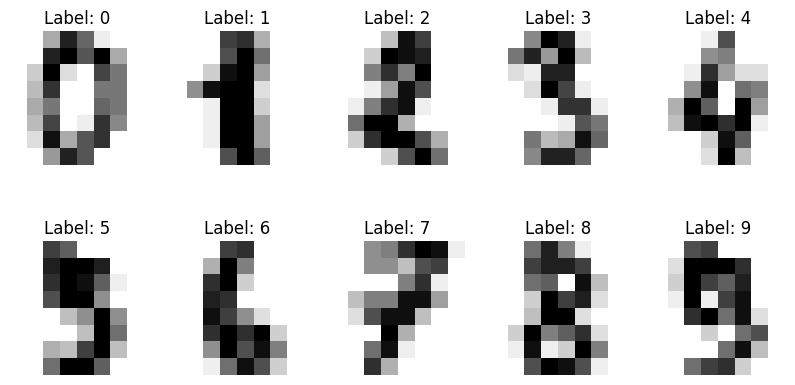

In [ ]:
# As the dataset has 64 features, creating a grid of graphs is not practical.
# However, you can visualize a few samples of the images in the dataset.

# Create a figure and axes to display the images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate over the axes, images, and labels
for ax, img, label in zip(axes.ravel(), digits.images, digits.target):
    # Display the image on the current axis
    ax.imshow(img, cmap=plt.cm.gray_r)

    # Turn off the axis labels
    ax.axis('off')

    # Set the title of the current axis with the label value
    ax.set_title(f'Label: {label}')

# Show the plot with the images
plt.show()


The code first imports the necessary libraries, matplotlib.pyplot for visualization and load_digits from sklearn.datasets to load the digits dataset.

After loading the dataset, a figure and axes are created using plt.subplots. The figsize parameter sets the size of the figure.

The code then iterates over the axes, images, and labels using the zip function. The ravel() method is used to flatten the axes array, making it easier to iterate over.

Within the loop, each image is displayed on its corresponding axis using ax.imshow. The colormap plt.cm.gray_r is used to display the images in grayscale.

The axis labels are turned off using ax.axis('off') to remove the coordinate axes.

The title of each axis is set to the corresponding label value using ax.set_title.

Finally, the plot with the images is displayed using plt.show().

# Block 4: Dimensionality reduction with PCA and TSNE

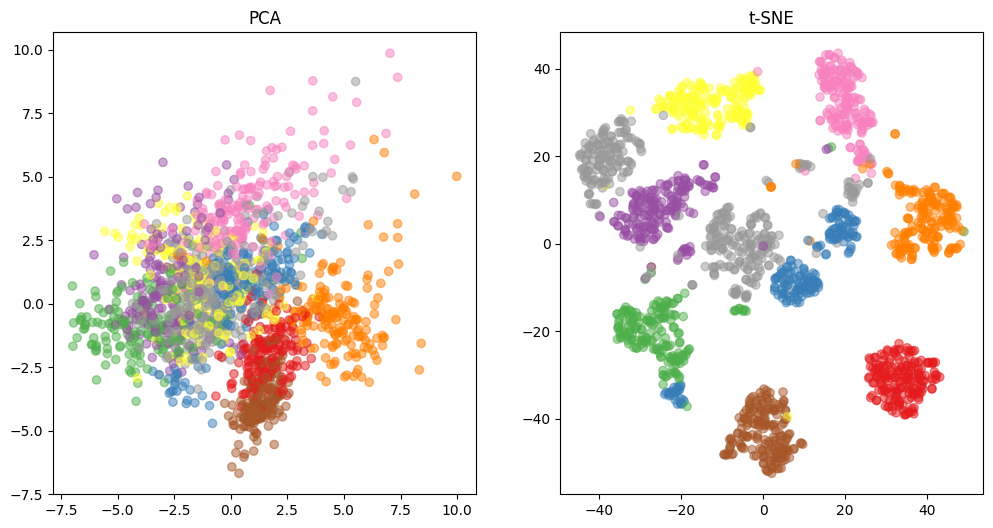

In [ ]:
# Create an instance of PCA with 2 components
pca = PCA(n_components=2)

# Apply PCA to the scaled feature data
X_pca = pca.fit_transform(X_scaled)

# Create an instance of TSNE with 2 components and random state 42
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to the scaled feature data
X_tsne = tsne.fit_transform(X_scaled)

# Create a figure and two subplots for the scatter plots of PCA and t-SNE results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot of PCA results
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap=plt.cm.Set1, alpha=0.5)
ax1.set_title('PCA')

# Scatter plot of t-SNE results
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target, cmap=plt.cm.Set1, alpha=0.5)
ax2.set_title('t-SNE')

# Display the plot
plt.show()

An instance of PCA with 2 components is created using PCA(n_components=2). PCA is then applied to the scaled feature data, X_scaled, using the fit_transform method.

Similarly, an instance of t-SNE with 2 components and random state 42 is created using TSNE(n_components=2, random_state=42). t-SNE is applied to the scaled feature data using the fit_transform method.

A figure with two subplots is created using plt.subplots(1, 2, figsize=(12, 6)). The subplots are assigned to ax1 and ax2, representing the scatter plots for PCA and t-SNE results, respectively.

The scatter plot for PCA results is created using ax1.scatter with the first and second components of X_pca as the x and y coordinates, respectively. The c=digits.target assigns colors based on the target values of the dataset. The colormap plt.cm.Set1 is used, and alpha=0.5 sets the transparency level. The title of the subplot is set to 'PCA' using ax1.set_title.

Similarly, the scatter plot for t-SNE results is created using ax2.scatter, with the first and second components of X_tsne as the x and y coordinates, respectively. The other parameters are set similarly to the PCA scatter plot. The title of the subplot is set to 't-SNE' using ax2.set_title.

Finally, the plot is displayed using plt.show().

# Block 5: K-means clustering

In [ ]:
# Number of clusters, you can experiment with different values of k
# Define the number of clusters
k = 10

# Create an instance of KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model to the scaled feature data
kmeans.fit(X_scaled)

# Obtain the cluster labels for each sample
cluster_labels = kmeans.labels_

# Create a new DataFrame using the original digit data
digits_df = pd.DataFrame(digits.data)

# Add the cluster labels as a new column in the DataFrame
digits_df['Cluster'] = cluster_labels

# Display the DataFrame with the cluster labels
digits_df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Cluster
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,3
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,3
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,7
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,7
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,3
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,7


The variable k is defined to represent the desired number of clusters.

An instance of the KMeans algorithm is created, specifying the number of clusters as k and setting the random state to 42.

The KMeans model is then fitted to the scaled feature data X_scaled using the fit method.

The cluster labels for each sample are obtained using the labels_ attribute of the KMeans object.

A new DataFrame called digits_df is created using the original digit data digits.data.

The cluster labels are added to the DataFrame as a new column named 'Cluster' using digits_df['Cluster'] = cluster_labels.

Finally, the DataFrame with the cluster labels is displayed, showing the original digit data along with the assigned cluster labels.

# Block 6: Comparing the clusters with the actual labels (optional, if the dataset is labeled)

In [ ]:
# Function to map cluster labels to original target labels
def map_cluster_to_label(cluster_labels, target_labels):
    label_map = {}  # Initialize an empty dictionary to store label mappings
    for i in range(np.max(cluster_labels) + 1):
        # Get unique target labels and their counts for samples in the current cluster
        unique, counts = np.unique(target_labels[cluster_labels == i], return_counts=True)
        # Map the cluster label to the target label with the highest count
        label_map[i] = unique[np.argmax(counts)]
    return label_map

# Map cluster labels to target labels using the custom function
label_map = map_cluster_to_label(cluster_labels, digits.target)

# Create an array of mapped labels based on the cluster labels
mapped_labels = np.array([label_map[label] for label in cluster_labels])

# Calculate accuracy by comparing mapped labels with the original target labels
accuracy = np.sum(mapped_labels == digits.target) / len(digits.target)

# Print the accuracy
print(f'Accuracy: {accuracy}')



Accuracy: 0.6210350584307178


The code defines a function called map_cluster_to_label that takes cluster_labels and target_labels as input to map the cluster labels to the original target labels. The function uses a dictionary label_map to store the mapping between cluster labels and target labels.

Within the function, a loop iterates over each unique cluster label using range(np.max(cluster_labels) + 1). For each cluster label, it retrieves the target labels of samples in that cluster using boolean indexing target_labels[cluster_labels == i]. The np.unique function is then used to get the unique target labels and their counts in the current cluster.

The label with the highest count is determined using np.argmax(counts), and the cluster label is mapped to this target label in the label_map dictionary.

After defining the function, it is called to map the cluster labels to target labels, and the resulting mapping is stored in the label_map variable.

To calculate accuracy, an array of mapped labels is created by iterating over cluster_labels and using the label_map dictionary to obtain the corresponding target label for each cluster label.

The accuracy is calculated by comparing the mapped labels with the original target labels. The number of matching labels is divided by the total number of labels to get the accuracy value.

Finally, the accuracy value is printed using print(f'Accuracy: {accuracy}').

# Supervised ML
Split your newly labeled data into training and test data and perform k-nearest
neighbors classification.

Use what we did in class with the Digits dataset as a guide:

• After training the model, feed it the test data to see how well the model predicts.

• Create a confusion matrix and a classification report using the cluster labels you generated earlier.

• If your dataset was originally labeled, you can also compare the classifications with the original labels.

# Block 7: Splitting the dataset into training and test data

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, mapped_labels, test_size=0.33, random_state=42)


The code imports the necessary libraries, including train_test_split from sklearn.model_selection, KNeighborsClassifier from sklearn.neighbors, and confusion_matrix and classification_report from sklearn.metrics.

The data is split into training and testing sets using the train_test_split function. The scaled feature data X_scaled is split into X_train and X_test, while the mapped labels mapped_labels are split into y_train and y_test. The test_size parameter specifies the proportion of the data to be used for testing (in this case, 33% of the data), and random_state is set to 42 to ensure reproducibility of the split.

# Block 8: Training the k-nearest neighbors model

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNeighborsClassifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the K-nearest neighbors model to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

The code imports the necessary library, KNeighborsClassifier from sklearn.neighbors, which is used for classification using the k-nearest neighbors algorithm.

An instance of KNeighborsClassifier is created with n_neighbors=5, indicating that the algorithm will consider the 5 nearest neighbors when making predictions.

The fit method of the KNeighborsClassifier object is then called to fit the model to the training data. It takes the training features X_train and corresponding labels y_train as input. The model learns the patterns in the training data in order to make predictions based on the provided features.

After fitting the model, it is ready to be used for making predictions on new, unseen data.

# Block 9: Testing the model and generating predictions

In [ ]:
# Use the trained K-nearest neighbors model to make predictions on the test data
y_pred = knn.predict(X_test)

# Print the predicted labels
y_pred


array([6, 3, 3, 7, 2, 2, 8, 2, 8, 2, 8, 1, 4, 0, 4, 8, 3, 7, 3, 2, 4, 3,
       3, 7, 8, 6, 3, 2, 6, 3, 4, 3, 2, 4, 4, 6, 3, 4, 7, 6, 6, 3, 8, 3,
       6, 1, 3, 0, 6, 8, 8, 8, 3, 8, 6, 0, 3, 0, 0, 1, 0, 4, 3, 2, 4, 3,
       7, 0, 7, 3, 3, 3, 3, 4, 7, 0, 4, 2, 3, 3, 3, 0, 2, 3, 3, 0, 6, 4,
       4, 3, 1, 2, 6, 3, 3, 2, 3, 0, 4, 4, 4, 3, 3, 3, 1, 8, 8, 1, 4, 2,
       7, 7, 4, 4, 1, 3, 8, 7, 3, 7, 2, 6, 3, 4, 0, 7, 2, 7, 2, 1, 2, 3,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 3, 4, 6, 3, 1, 6, 3, 0, 3, 3, 6, 6, 0,
       6, 4, 2, 3, 3, 8, 7, 2, 3, 0, 4, 8, 3, 6, 8, 7, 3, 8, 4, 8, 8, 3,
       7, 7, 2, 8, 3, 3, 3, 0, 3, 8, 2, 3, 6, 3, 3, 4, 8, 2, 7, 2, 3, 6,
       4, 8, 3, 3, 3, 7, 8, 3, 4, 8, 8, 3, 4, 4, 3, 6, 8, 2, 6, 0, 4, 8,
       2, 7, 4, 6, 4, 2, 6, 0, 3, 2, 3, 6, 7, 1, 3, 2, 4, 7, 6, 8, 8, 3,
       8, 8, 6, 2, 8, 8, 7, 8, 7, 6, 2, 2, 2, 3, 4, 3, 8, 3, 6, 0, 3, 7,
       7, 0, 8, 0, 4, 3, 8, 8, 3, 6, 0, 4, 2, 0, 0, 3, 6, 3, 3, 7, 3, 3,
       3, 3, 3, 8, 3, 3, 3, 1, 0, 8, 8, 3, 4, 0, 2,

The code uses the trained K-nearest neighbors model, knn, to make predictions on the test data, X_test. The predict method of the KNeighborsClassifier object is used to generate predicted labels based on the provided test features.

The predicted labels are assigned to the variable y_pred. This variable contains the predicted labels for the test data.

Finally, the code prints the predicted labels by displaying the y_pred variable

# Block 10: Creating a confusion matrix and a classification report using the cluster labels

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Generate the classification report
cr = classification_report(y_test, y_pred)

# Print the classification report
print("\nClassification Report:\n", cr)


Confusion Matrix:
 [[ 55   0   0   0   0   1   0   0]
 [  0  25   0   2   4   1   1   1]
 [  0   0  61   6   0   0   1   1]
 [  0   0   1 149   0   1   0   2]
 [  0   0   0   0  56   0   1   0]
 [  0   0   0   0   0  57   0   0]
 [  0   0   0   2   1   0  66   1]
 [  0   2   4   4   0   0   2  86]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.93      0.74      0.82        34
           2       0.92      0.88      0.90        69
           3       0.91      0.97      0.94       153
           4       0.92      0.98      0.95        57
           6       0.95      1.00      0.97        57
           7       0.93      0.94      0.94        70
           8       0.95      0.88      0.91        98

    accuracy                           0.93       594
   macro avg       0.94      0.92      0.93       594
weighted avg       0.93      0.93      0.93       594



The code imports the necessary libraries, including confusion_matrix and classification_report from sklearn.metrics. These functions are used to evaluate the performance of the classification model.

The confusion matrix is computed using the confusion_matrix function. It takes the true labels y_test and the predicted labels y_pred as inputs and computes the confusion matrix, which is a table that summarizes the performance of a classification algorithm.

The confusion matrix is then printed using print("Confusion Matrix:\n", cm), where cm is the variable storing the computed confusion matrix.

The classification report is generated using the classification_report function. It takes the true labels y_test and the predicted labels y_pred as inputs and generates a report containing various metrics such as precision, recall, F1-score, and support for each class.

The classification report is printed using print("\nClassification Report:\n", cr), where cr is the variable storing the generated classification report.

# Block 11: Comparing the classifications with the original labels (optional, if the dataset was originally labeled)

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report

# Obtain the indices of the original dataset corresponding to X_test
_, X_test_indices, _, _ = train_test_split(np.arange(X_scaled.shape[0]), mapped_labels, test_size=0.33, random_state=42)

# Get the original target labels for the test data
original_y_test = digits.target[X_test_indices]

# Predict the original labels using the trained model
original_y_pred = np.array([label_map[label] for label in knn.predict(X_test)])

# Compute the confusion matrix for the original labels
original_cm = confusion_matrix(original_y_test, original_y_pred)

# Print the confusion matrix for the original labels
print("Confusion Matrix (Original Labels):\n", original_cm)

# Generate the classification report for the original labels
original_cr = classification_report(original_y_test, original_y_pred)

# Print the classification report for the original labels
print("\nClassification Report (Original Labels):\n", original_cr)


Confusion Matrix (Original Labels):
 [[55  0  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0 17 11  0  0]
 [ 0  0  8  0  0  0  2 42  0  0]
 [ 0  0  1  2  0  0  0  1 52  0]
 [ 0  0  0  4 60  0  0  0  0  0]
 [ 0  0 26  0  1  0  0  8 38  0]
 [ 0  0 57  0  0  0  0  0  0  0]
 [ 0  0  0 61  0  0  0  1  0  0]
 [ 0  0 29  0  0  0  2  3 18  0]
 [ 0  0  3  4  0  0  6  0 55  0]]

Classification Report (Original Labels):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.00      0.00      0.00        55
           2       0.05      0.15      0.08        52
           3       0.03      0.04      0.03        56
           4       0.98      0.94      0.96        64
           5       0.00      0.00      0.00        73
           6       0.00      0.00      0.00        57
           7       0.02      0.02      0.02        62
           8       0.11      0.35      0.17        52
           9       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The code retrieves the indices of the original dataset that correspond to X_test by using train_test_split with np.arange(X_scaled.shape[0]). The test_size, random_state, and mapped_labels are the same values used previously to split the data.

The original target labels for the test data are obtained from digits.target using the retrieved indices and assigned to original_y_test.

The model is then used to predict the original labels by iterating over the predicted labels for X_test and mapping them to the original labels using the label_map dictionary. The predicted original labels are assigned to original_y_pred.

The confusion matrix is computed for the original labels using confusion_matrix with original_y_test and original_y_pred as inputs. The resulting confusion matrix is assigned to original_cm.

The confusion matrix for the original labels is printed using print("Confusion Matrix (Original Labels):\n", original_cm).

Similarly, the classification report for the original labels is generated using classification_report with original_y_test and original_y_pred as inputs. The resulting report is assigned to original_cr.

The classification report for the original labels is printed using print("\nClassification Report (Original Labels):\n", original_cr).

# some additional interesting operations that you can perform on the dataset:

# Other experiments
Python makes it easy to explore and experiment with different operations!

What additional interesting operations can you perform on the data, either while doing supervised or unsupervised machine learning, or both?

# Interesting Operation 1: Feature importance analysis using Random Forest Classifier

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier with random state 42
rf = RandomForestClassifier(random_state=42)

# Fit the RandomForestClassifier model to the training data
rf.fit(X_train, y_train)

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=digits.feature_names, columns=["importance"])

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importances)


Feature Importances:
            importance
pixel_5_3    0.043568
pixel_4_5    0.040638
pixel_5_4    0.037858
pixel_4_6    0.037620
pixel_6_6    0.035183
...               ...
pixel_6_0    0.000020
pixel_0_0    0.000000
pixel_7_0    0.000000
pixel_4_7    0.000000
pixel_4_0    0.000000

[64 rows x 1 columns]


The code imports the necessary library, RandomForestClassifier from sklearn.ensemble, which is used for classification using a random forest algorithm.

An instance of RandomForestClassifier is created with random_state=42, which sets the random seed for reproducibility.

The fit method of the RandomForestClassifier object is then called to fit the model to the training data. It takes the training features X_train and corresponding labels y_train as input. The model learns the patterns in the training data to make predictions based on the provided features.

A DataFrame called feature_importances is created to store the feature importances computed by the random forest model. The importances are calculated using the feature_importances_ attribute of the RandomForestClassifier object. The index of the DataFrame is set to digits.feature_names to represent the names of the features.

The feature importances DataFrame is sorted in descending order based on the "importance" column using the sort_values method.

Finally, the feature importances are printed using print("Feature Importances:\n", feature_importances). This displays the DataFrame that contains the feature importances in descending order, indicating the relative importance of each feature according to the random forest model.

# Interesting Operation 2: Visualize decision boundaries of k-nearest neighbors classifier

<ipython-input-14-52112633a5f4>:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.5, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black', s=40)


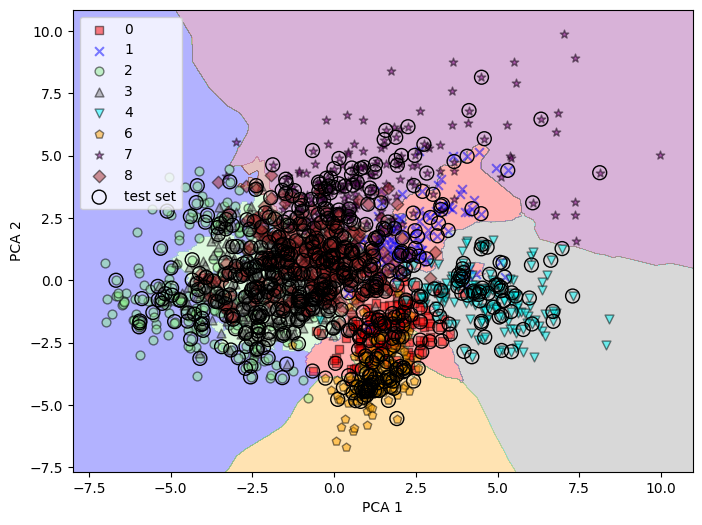

In [ ]:
# Import necessary libraries
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, clf, test_idx=None, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v', 'p', '*', 'D', 'h')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'orange', 'purple', 'brown', 'magenta', 'pink')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Set the minimum and maximum values for the x-axis and y-axis
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a meshgrid of points with the specified resolution
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # Predict the labels for the meshgrid points
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Create a contour plot of the decision boundaries
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)

    # Set the limits for the x-axis and y-axis
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot the training samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.5, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black', s=40)

    # Plot the test samples if test_idx is provided
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], facecolor='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')


# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, mapped_labels, test_size=0.33, random_state=42)

# Train k-nearest neighbors classifier on PCA transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)

# Create a figure to plot the decision boundaries
plt.figure(figsize=(8, 6))

# Plot the decision boundaries
plot_decision_boundaries(X_pca, mapped_labels, clf=knn_pca, test_idx=X_test_indices)

# Set the x-axis and y-axis labels
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Add a legend to the plot
plt.legend(loc="upper left")

# Display the plot
plt.show()


The code defines a function called plot_decision_boundaries that takes X, y, clf, test_idx, and resolution as input to plot the decision boundaries of a classifier.

Within the function, markers and colors are defined to represent the markers and colors used for different classes.

The `ListedColormapfrom matplotlib.colors is imported to create a colormap based on the defined colors.

The minimum and maximum values for the x-axis and y-axis are set based on the input feature data X.

A meshgrid of points is created using np.meshgrid with the specified resolution.

The classifier clf is used to predict the labels for the meshgrid points, and the predicted labels are reshaped to match the shape of the meshgrid.

A contour plot of the decision boundaries is created using plt.contourf.

The limits for the x-axis and y-axis are set using plt.xlim and plt.ylim.

The training samples are plotted using a loop over the unique classes in y, with each class represented by a different marker and color.

If test_idx is provided, the test samples are plotted as well.

Following the function definition, PCA is applied to the scaled feature data X_scaled to reduce the dimensionality to 2 using PCA(n_components=2).

The PCA-transformed data is split into training and testing sets using train_test_split, and the training set is used to train a k-nearest neighbors classifier with KNeighborsClassifier(n_neighbors=5).

A figure is created to plot the decision boundaries.

The plot_decision_boundaries function is called to plot the decision boundaries using the PCA-transformed data, the trained k-nearest neighbors classifier, and the test indices.

The x-axis and y-axis labels are set using plt.xlabel and plt.ylabel.

A legend is added to the plot using plt.legend.

Finally, the plot is displayed using plt.show().

These additional operations provide more insights into the dataset and the classifier's performance. The feature importance analysis helps you understand which features are the most important for classification, while the decision boundary visualization helps you visualize how the classifier separates the different classes in a lower-dimensional space.